In [1]:
#Connect Google Drive
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train.zip" -d "/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train"

Archive:  /content/Target_train.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/Target_train.zip or
        /content/Target_train.zip.zip, and cannot find /content/Target_train.zip.ZIP, period.


In [ ]:
!unzip "/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train.zip" -d "/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train"

In [ ]:
import tensorflow as tf
tf.__version__
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu

In [ ]:
cd /content/drive/MyDrive/cse499/sergeant action detection/Demo Dataset 100

/content/drive/MyDrive/cse499/sergeant action detection/Demo Dataset 100


In [2]:
path = "/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Target_train"
annot = "/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Target_train"


In [ ]:
import pandas as pd
col_names=['ACTION','X1','Y1','X2','Y2']
df = pd.read_csv('/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Target_train/real1_frame_490.bboxes.csv', names=col_names, header=None)

df

,ACTION,X1,Y1,X2,Y2
0,PullingTissue,158,257,343,424
1,SuckingBlood,406,351,618,508
2,CuttingTissue,291,75,496,243


In [3]:
#fie path with glob all at once
import pandas as pd
import glob

src_directory = '/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Target_train'
all_files = glob.glob(src_directory + "/*.csv")
all_files



['/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Target_train/real2_frame_4742.csv',
 '/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Target_train/real2_frame_4449.csv',
 '/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Target_train/real2_frame_4547.csv',
 '/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Target_train/real2_frame_4454.csv',
 '/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Target_train/real2_frame_4726.csv',
 '/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Target_train/real2_frame_4523.csv',
 '/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Target_train/real2_frame_4365.csv',
 '/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Target_train/real2_frame_4649.csv',
 '/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Target_train/real2_frame_4660.csv',
 '/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Target_train/real2_frame_4603.csv',
 '/content/drive/MyDrive/cse499/RCNN/Dataset/Target_train/Ta

In [4]:
#For loop to give column names from files as LIST
li=[] #empty files

for filename in all_files:
  col_names=['ACTION','X1','Y1','X2','Y2']
  df=pd.read_csv(filename,names=col_names, header=None)
  
  df['ACTION']= df.ACTION.map({'CuttingMesocolon': 1,'PullingVasDeferens': 2 ,'ClippingVasDeferens': 3,'CuttingVasDeferens': 4,'ClippingTissue': 5,'PullingSeminalVesicle': 6,'ClippingSeminalVesicle': 7,'CuttingSeminalVesicle': 8,'SuckingBlood': 9,'SuckingSmoke': 10,'PullingTissue': 11,'CuttingTissue': 12,'BaggingProstate': 13,'BladderNeckDissection': 14,'BladderAnastomosis': 15,'PullingProstate': 16,'ClippingBladderNeck': 17,'CuttingThread': 18,'UrethraDissection': 19,'CuttingProstate': 20,'PullingBladderNeck': 21})
  li.append(df)
  

In [ ]:
li[4]

,ACTION,X1,Y1,X2,Y2
0,12,184,221,346,339
1,11,7,246,198,436


In [ ]:
#Dataset split without sklearn
#Still not implemented
#import argparse
#import os
#from random import shuffle
#import pandas as pd
#from math import floor
#import shutil

##parser = argparse.ArgumentParser()
#parser.add_argument('--datadir', help='Path to the all input data', type=str)
#parser.add_argument('--split', help='Split value - Test %', type=float, default=0.1)
#parser.add_argument('--train_output', help='Path to output train data', type=str)
#parser.add_argument('--test_output', help='Path to output test data', type=str)
#parser.add_argument('--image_ext', help='jpeg or jpg or png', type=str, default='jpg')
#FLAGS = parser.parse_args()

#def check_dir(directory):
#    if not os.path.exists(directory):
#        os.makedirs(directory)
#        print('Creating directory -', directory)
#    else:
#        print('Directory exists -', directory)

#def get_file_list_from_dir(datadir):
#    all_files = os.listdir(os.path.abspath(datadir))
#    data_files = list(filter(lambda file: file.endswith('.'+FLAGS.image_ext), all_files))
#    shuffled_files = randomize_files(data_files)
#    all_cervix_images = pd.DataFrame({'imagepath': shuffled_files})
#    all_cervix_images['filename'] = all_cervix_images.apply(lambda row: row.imagepath.split(".")[0], axis=1)
#    return all_cervix_images

#def randomize_files(file_list):
#    shuffle(file_list)
#    return  file_list

#def get_training_and_testing_sets(file_list, split):
#    split_index = floor(file_list.shape[0] * split)
#    testing = file_list[:split_index]
#    training = file_list[split_index:]
#    training = training.reset_index(drop=True)
#    return training, testing

#def write_data(training, testing, datadir, train_output, test_output):
    
    # Train Data
#    print ('Writing -', training.shape[0], '- Train data images at -', train_output)
#    for name in training['filename']:
#        try:
#            # Moving xmls
#            rd_path = os.path.join(datadir, name+'.xml')

#            wr_path = os.path.join(train_output, name+'.xml')
#            shutil.move(rd_path, wr_path)

            # Moving images
#            rd_path = os.path.join(datadir, name+'.'+FLAGS.image_ext)
            
#            wr_path = os.path.join(train_output, name+'.'+FLAGS.image_ext)
#            shutil.move(rd_path, wr_path)
#        except:
#            print('Could not find {}'.format(name+'.xml'))

    # Test Data
#    print ('Writing -', testing.shape[0], '- Test data images at -', test_output)
#    for name in testing['filename']:
#        try:
#            # Moving xmls
#            rd_path = os.path.join(datadir, name+'.xml')

#            wr_path = os.path.join(test_output, name+'.xml')
#            shutil.move(rd_path, wr_path)

            # Moving images
#            rd_path = os.path.join(datadir, name+'.'+FLAGS.image_ext)
            
#            wr_path = os.path.join(test_output, name+'.'+FLAGS.image_ext)
#            shutil.move(rd_path, wr_path)
#        except:
#            print('Could not find {}'.format(name+'.xml'))

#def main():
#    check_dir(FLAGS.train_output)
#    check_dir(FLAGS.test_output)
#    file_list = get_file_list_from_dir(FLAGS.datadir)
#    print('Read -', file_list.shape[0], '- files from the directory -', FLAGS.datadir)
#    training, testing = get_training_and_testing_sets(file_list, FLAGS.split)
#    write_data(training, testing, FLAGS.datadir, FLAGS.train_output, FLAGS.test_output)

#if __name__ == '__main__':
#    main()

In [ ]:
#Sklearn split
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

x= df.iloc[:,[1,2,3,4]]
y=df.ACTION
print(x.shape)
print(y.shape)

(2, 4)
(2,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1, 4)
(1, 4)
(1,)
(1,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state =1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1, 4)
(1, 4)
(1,)
(1,)


In [ ]:
import numpy as np
print(np.mean(x_train))
print(np.mean(x_test))
print(np.mean(y_train))
print(np.mean(y_test))

X1    497.0
Y1    183.0
X2    671.0
Y2    338.0
dtype: float64
X1    251.0
Y1    353.0
X2    539.0
Y2    534.0
dtype: float64
2.0
1.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer()
xtrain=cv.fit_transform(x_train)


In [ ]:
#ML Algorithm
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
model.score(x_test,y_test)

0.0

In [ ]:
pred = model.predict(x_test)
pred

array([2])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[0, 1],
       [0, 0]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Mapping Function

df.ACTION.unique()

array([1, 2])

In [ ]:
#combine all the files

#df['ACTION'] = df.ACTION.astype('category').cat.codes
#df

In [ ]:
#df.to_csv('/content/drive/MyDrive/cse499/sergeant action detection/Dataset/new/*.csv')

In [ ]:
#!ls

real1_frame_492.jpg


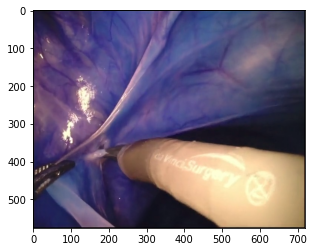

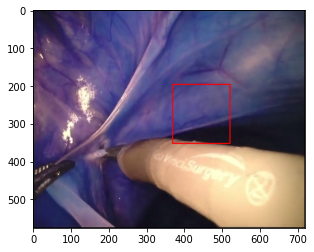

In [5]:
from matplotlib import pyplot as plt
import cv2
import os
import pandas as pd
from skimage import io


Index=492
filename = "real1_frame_"+str(Index)+".jpg"
print(filename)
col_names=['ACTION','X1','Y1','X2','Y2']
img = cv2.imread(os.path.join(path,filename))
df = pd.read_csv(os.path.join(annot,filename.replace(".jpg",".bboxes.csv")), names=col_names, header=None)

df['ACTION']= df.ACTION.map({'CuttingMesocolon': 1,'PullingVasDeferens': 2 ,'ClippingVasDeferens': 3,'CuttingVasDeferens': 4,'ClippingTissue': 5,'PullingSeminalVesicle': 6,'ClippingSeminalVesicle': 7,'CuttingSeminalVesicle': 8,'SuckingBlood': 9,'SuckingSmoke': 10,'PullingTissue': 11,'CuttingTissue': 12,'BaggingProstate': 13,'BladderNeckDissection': 14,'BladderAnastomosis': 15,'PullingProstate': 16,'ClippingBladderNeck': 17,'CuttingThread': 18,'UrethraDissection': 19,'CuttingProstate': 20,'PullingBladderNeck': 21})
li.append(df)

plt.imshow(img)
for row in df.iterrows():
            x1 = int(row[1][1])
            y1 = int(row[1][2])
            x2 = int(row[1][3])
            y2 = int(row[1][4])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
plt.figure()
plt.imshow(img)

In [6]:
img.shape

(576, 720, 3)

In [7]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

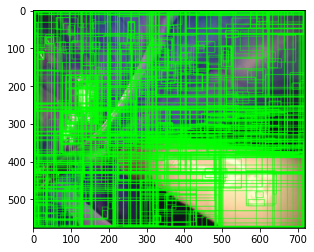

In [8]:
from matplotlib import pyplot as plt

im = cv2.imread(os.path.join(path,"real1_frame_492.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [9]:
def get_iou(bb1, bb2):
  # assuring for proper dimension.
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
  # calculating dimension of common area between these two boxes.
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
  # if there is no overlap output 0 as intersection area is zero.
    if x_right < x_left or y_bottom < y_top:
        return 0.0
  # calculating intersection area.
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
  # individual areas of both these bounding boxes.
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
  # union area = area of bb1_+ area of bb2 - intersection of bb1 and bb2.
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [10]:
# At the end of below code we will have our train data in these lists
train_images=[]
train_labels=[]

In [ ]:
import os
import numpy as np 
from keras.preprocessing import image
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("real1_frame_"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            col_names=['ACTION','X1','Y1','X2','Y2']
            image  = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,filename.replace(".jpg",".bboxes.csv")), names=col_names, header=None)
            df['ACTION']= df.ACTION.map({'CuttingMesocolon': 1,'PullingVasDeferens': 2 ,'ClippingVasDeferens': 3,'CuttingVasDeferens': 4,'ClippingTissue': 5,'PullingSeminalVesicle': 6,'ClippingSeminalVesicle': 7,'CuttingSeminalVesicle': 8,'SuckingBlood': 9,'SuckingSmoke': 10,'PullingTissue': 11,'CuttingTissue': 12,'BaggingProstate': 13,'BladderNeckDissection': 14,'BladderAnastomosis': 15,'PullingProstate': 16,'ClippingBladderNeck': 17,'CuttingThread': 18,'UrethraDissection': 19,'CuttingProstate': 20,'PullingBladderNeck': 21})
            li.append(df)
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][1])
                y1 = int(row[1][2])
                x2 = int(row[1][3])
                y2 = int(row[1][4])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)   # setting given image as base image
            ss.switchToSelectiveSearchFast()     # running selective search on bae image 
            ssresults = ss.process()     # processing to get the outputs
            imout = image.copy()   
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:     # till 2000 to get top 2000 regions only
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})  # calculating IoU for each of the proposed regions
                        if counter < 30:       # getting only 30 psoitive examples
                            if iou > 0.70:     # IoU or being positive is 0.7
                                timage = imout[x:x+w,y:y+h]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1              # to insure we have collected all psotive examples
                        if falsecounter <30:      # 30 negatve examples are allowed only
                            if iou < 0.3:         # IoU or being negative is 0.3
                                timage = imout[x:x+w,y:y+h]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1             #to ensure we have collected all negative examples
                    if fflag == 1 and bflag == 1:  
                        print("inside")
                        flag = 1        # to signal the complition of data extaction from a particular image
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

5000 real1_frame_767.jpg
OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

error in real1_frame_767.jpg
5001 real1_frame_866.jpg
OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

error in real1_frame_866.jpg
5002 real1_frame_868.jpg
OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

error in real1_frame_868.jpg
5003 real1_frame_823.jpg
OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

error in real1_frame_823.jpg
5004 real1_frame_795.jpg
OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

error in real1_frame_795.jpg
5005 real1_frame_795.jpg
OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp

In [31]:
train_images
train_labels

[]

In [32]:
# conversion of train data into arrays for further training
import numpy as np

X_new = np.array(train_images)
Y_new = np.array(train_labels)

In [33]:
from tensorflow import keras 
from keras.layers import Dense
from keras import Model
from keras import optimizers

In [34]:
import tensorflow as tf
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
for layer in vgg.layers[:-2]:
  layer.trainable = False
x = vgg.get_layer('fc2')
last_output =  x.output
x = tf.keras.layers.Dense(1,activation = 'sigmoid')(last_output)  
model = tf.keras.Model(vgg.input,x)
model.compile(optimizer = "adam", 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [35]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


In [36]:
tf.__version__
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU' or x.device_type == 'CPU']

In [37]:
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7



In [ ]:
model.summary()
model.fit(X_new,Y_new,batch_size = 32,epochs = 2,validation_split=.02)

In [ ]:
svm_image = [];
svm_label = [];

In [ ]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("real1_frame_"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = io.imread(os.path.join(path,filename))
            #image = cv2.imread(os.path.join(path,filename))
            col_names=['ACTION','X1','Y1','X2','Y2']
            df = pd.read_csv(os.path.join(annot,i), names=col_names, header=None)
            df.drop([0],axis=0,inplace=True)
            df['ACTION']= df.ACTION.map({'CuttingMesocolon': 1,'PullingVasDeferens': 2 ,'ClippingVasDeferens': 3,'CuttingVasDeferens': 4,'ClippingTissue': 5,'PullingSeminalVesicle': 6,'ClippingSeminalVesicle': 7,'CuttingSeminalVesicle': 8,'SuckingBlood': 9,'SuckingSmoke': 10,'PullingTissue': 11,'CuttingTissue': 12,'BaggingProstate': 13,'BladderNeckDissection': 14,'BladderAnastomosis': 15,'PullingProstate': 16,'ClippingBladderNeck': 17,'CuttingThread': 18,'UrethraDissection': 19,'CuttingProstate': 20,'PullingBladderNeck': 21})
            li.append(df)
            gtvalues=[]

            for row in df.iterrows():
                x1 = int(row[1][1])
                y1 = int(row[1][2])
                x2 = int(row[1][3])
                y2 = int(row[1][4])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
                timage = image[x1:x2,y1:y2]
                #resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                #svm_image.append(resized)
                svm_label.append([0,1])
            ss.setBaseImage(image)
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if falsecounter <5:
                            if iou < 0.3:
                                timage = imout[x:x+w,y:y+h]
                                #resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                #svm_image.append(resized)
                                svm_label.append([1,0])
                                falsecounter += 1
                        else :
                            flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

In [ ]:
cd "/content/drive/"

/content/drive


In [ ]:
model.save('/content/final_model.h5')

In [ ]:
#adding svm to last layer
x =model.get_layer('fc2').output
Y = tf.keras.layers.Dense(1)(x)
final_model = tf.keras.Model(model.input,Y)
final_model.compile(loss='hinge',
              optimizer='adam',
              metrics=['accuracy'])
final_model.summary()
final_model.load_weights('/content/final_model.h5')

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [ ]:
hist_final = final_model.fit(np.array(svm_image),np.array(svm_label),batch_size=32,epochs = 20,validation_split = 0.05)

Epoch 1/20
5/5 [==============================] - 11s 2s/step - loss: 194.3036 - accuracy: 0.5000 - val_loss: 56.2466 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 1s 270ms/step - loss: 64.1311 - accuracy: 0.5000 - val_loss: 75.1541 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 1s 270ms/step - loss: 53.5238 - accuracy: 0.5000 - val_loss: 36.1487 - val_accuracy: 0.5000
Epoch 4/20
5/5 [==============================] - 1s 269ms/step - loss: 37.9760 - accuracy: 0.5000 - val_loss: 34.6677 - val_accuracy: 0.5000
Epoch 5/20
5/5 [==============================] - 1s 272ms/step - loss: 28.3016 - accuracy: 0.5000 - val_loss: 20.7974 - val_accuracy: 0.5000
Epoch 6/20
5/5 [==============================] - 1s 271ms/step - loss: 21.9126 - accuracy: 0.5000 - val_loss: 15.1829 - val_accuracy: 0.5000
Epoch 7/20
5/5 [==============================] - 1s 272ms/step - loss: 14.8327 - accuracy: 0.5000 - val_loss: 14.7683 - val_accuracy: 0.5000
Epoch 8

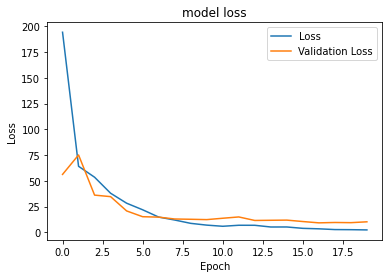

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist_final.history['loss'])
plt.plot(hist_final.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('/content/chart loss.png')

In [ ]:
###########  it's time for test a image    ##########
#pathss="/content/drive/MyDrive/cse499//sergeant action detection//Dataset/demo/val/images/"
image = cv2.imread('/content/drive/MyDrive/cse499//sergeant action detection//Dataset/demo/val/images/real3_frame_16.jpg')
ss.setBaseImage(image)

ssresults = ss.process()


boxes = []
count = 0
for e,result in enumerate(ssresults):
  if e < 50:
    x,y,w,h = result
    timage = imout[x:x+w,y:y+h]
    #resized = cv2.resize(timage.reshape(576, 720, 3), interpolation = cv2.INTER_AREA)
    #resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
    #resized = np.expand_dims(resized,axis = 0)
    out = final_model.predict(resized)
    print(e,out)
    if(out[0,0]<out[0,0]):
      boxes.append([x,y,w,h])
      count+=1

for box in boxes:
    x, y, w, h = box
    print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)
